### M.Aizaz Ud Din

In [7]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import warnings
warnings. simplefilter(action='ignore')

In [30]:
cancer = load_breast_cancer()

In [31]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Convert dataset into Panda Dataframe

In [32]:
df = pd.DataFrame([cancer])
df.keys()

Index(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names',
       'filename'],
      dtype='object')

In [33]:
cancer.data.shape

(569, 30)

In [34]:
print(cancer.target_names) ,np.bincount(cancer.target)

['malignant' 'benign']


(None, array([212, 357], dtype=int64))

In [35]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)


(506, 13)


In [37]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


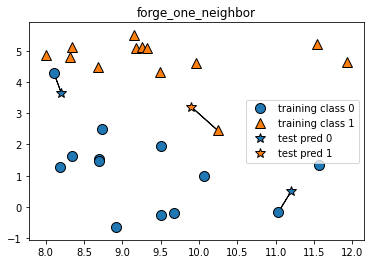

In [38]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("forge_one_neighbor");


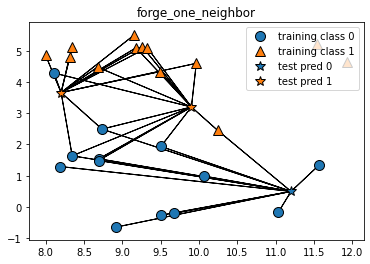

In [39]:
mglearn.plots.plot_knn_classification(n_neighbors=13)
plt.title("forge_one_neighbor");


In [40]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [42]:
clf.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=3, p=2,weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=3)

In [43]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [44]:
clf.score(X_test, y_test)

0.8571428571428571

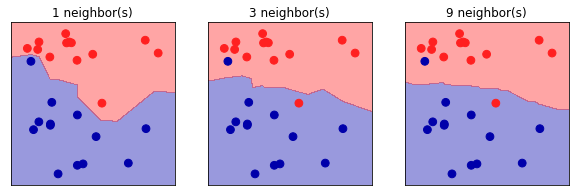

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)

## We will do this on the real world breast cancer dataset.

In [46]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

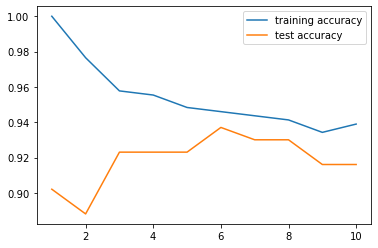

In [47]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
 # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.legend()

# k-Neighbors Regression

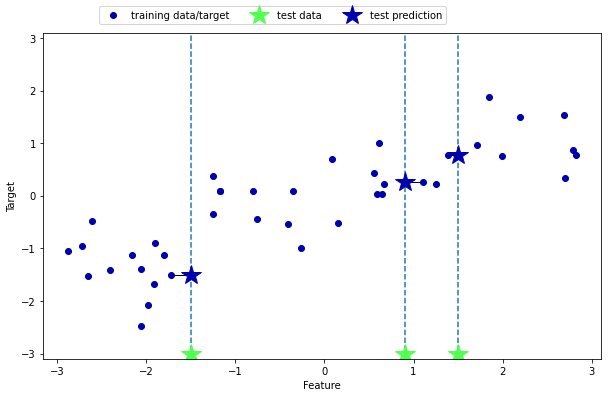

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

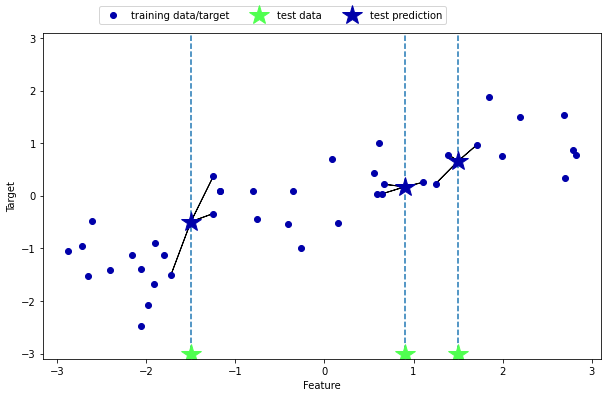

In [49]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [52]:
reg = KNeighborsRegressor(n_neighbors=3)

In [53]:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [54]:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=3, p=2,weights='uniform')

KNeighborsRegressor(n_jobs=1, n_neighbors=3)

In [55]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [56]:
reg.score(X_test, y_test)

0.8344172446249605

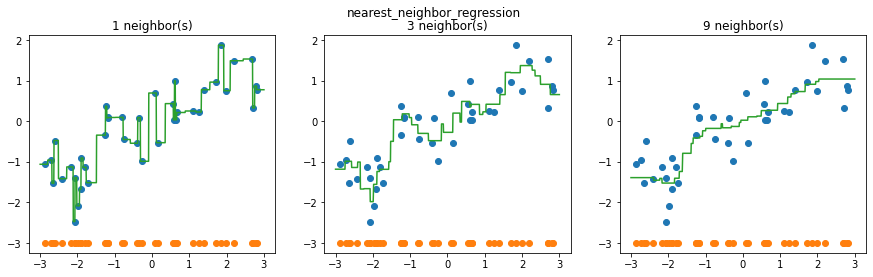

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.suptitle("nearest_neighbor_regression")
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    ax.plot(X, y, 'o')
    ax.plot(X, -3 * np.ones(len(X)), 'o')
    ax.plot(line, reg.predict(line))
    ax.set_title("%d neighbor(s)" % n_neighbors)


# Linear models for regression

w[0]: 0.393906  b: -0.031804


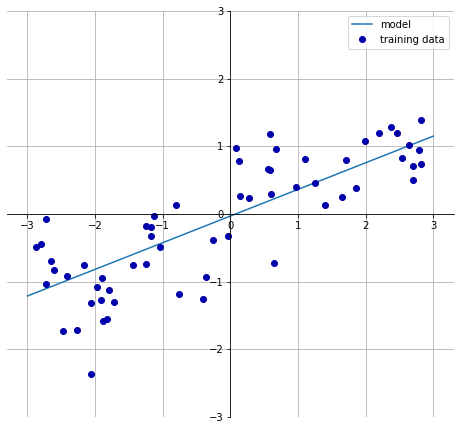

In [58]:
mglearn.plots.plot_linear_regression_wave()

In [59]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
print(X[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]


In [61]:
print(y[:5])

[-1.18073311  0.50015912  0.13772889  1.17396178 -1.32035898]


In [62]:
lr = LinearRegression()

In [63]:
lr.fit(X_train,y_train)

LinearRegression()

## Find slope w and  intercept_  b

In [64]:
print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)


lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [65]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.670089
test set score: 0.659337


### Boston dataset

In [66]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)


In [67]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.952052
test set score: 0.607472


## Ridge regression

In [68]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))


training set score: 0.885797
test set score: 0.752768


In [69]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))


training set score: 0.788279
test set score: 0.635941


In [70]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))


training set score: 0.928227
test set score: 0.772207


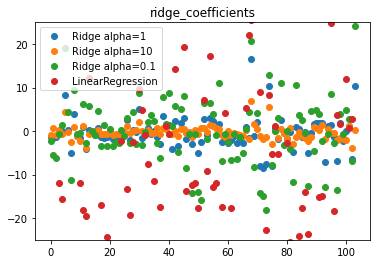

In [71]:
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()

## Lasso

In [72]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))


training set score: 0.293238
test set score: 0.209375
number of features used: 4


In [77]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("training set score: %f" % lasso001.score(X_train, y_train))
print("test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))

training set score: 0.896112
test set score: 0.767800
number of features used: 32


D:\Install\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


In [78]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("training set score: %f" % lasso00001.score(X_train, y_train))
print("test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))


training set score: 0.942093
test set score: 0.697654
number of features used: 100


D:\Install\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915621, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


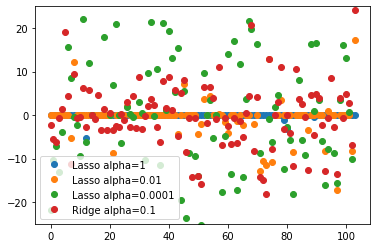

In [79]:
plt.plot(lasso.coef_, 'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()

## Linear models for Classification


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [81]:
X, y = mglearn.datasets.make_forge()

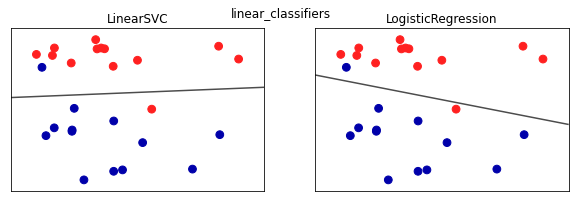

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
plt.suptitle("linear_classifiers")
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__)


### Breast Cancer

In [86]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logisticregression = LogisticRegression().fit(X_train, y_train)
print("training set score: %f" % logisticregression.score(X_train, y_train))
print("test set score: %f" % logisticregression.score(X_test, y_test))

training set score: 0.941315
test set score: 0.958042


In [87]:
logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
print("training set score: %f" % logisticregression100.score(X_train, y_train))
print("test set score: %f" % logisticregression100.score(X_test, y_test))

training set score: 0.946009
test set score: 0.958042


In [88]:
logisticregression001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("training set score: %f" % logisticregression001.score(X_train, y_train))
print("test set score: %f" % logisticregression001.score(X_test, y_test))


training set score: 0.934272
test set score: 0.930070


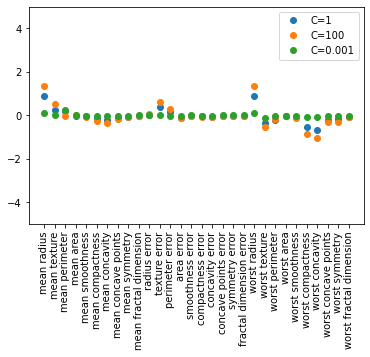

In [89]:
plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()

training accuracy of L1 logreg with C=0.001000: 0.913146
test accuracy of L1 logreg with C=0.001000: 0.923077
training accuracy of L1 logreg with C=1.000000: 0.960094
test accuracy of L1 logreg with C=1.000000: 0.958042
training accuracy of L1 logreg with C=100.000000: 0.985915
test accuracy of L1 logreg with C=100.000000: 0.979021


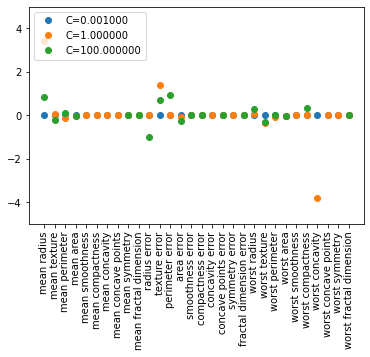

In [90]:
for C in [0.001, 1, 100]:
    lr_l1 = LogisticRegression(C=C, penalty="l1",solver='liblinear').fit(X_train, y_train)
    print("training accuracy of L1 logreg with C=%f: %f" % (C, lr_l1.score(X_train, y_train)))
    print("test accuracy of L1 logreg with C=%f: %f"% (C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, 'o', label="C=%f" % C)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend(loc=2)


## Linear Models for multiclass classification


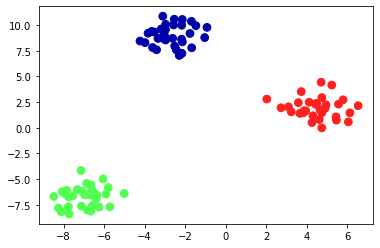

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)

In [8]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


(-10.0, 8.0)

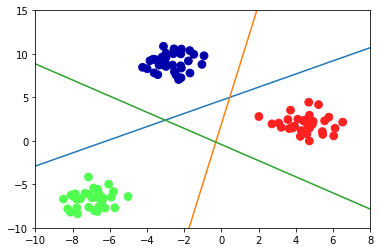

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)
